### Probelm Statement

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from pandas import set_option

In [2]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

In [6]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [8]:
data.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [9]:
set_option('precision', 2)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.79,4.36,0.8,4.08,7.25,11.25,17.4
Assault,50.0,170.76,83.34,45.0,109.00,159.00,249.00,337.0
UrbanPop,50.0,65.54,14.47,32.0,54.50,66.00,77.75,91.0
Rape,50.0,21.23,9.37,7.3,15.07,20.10,26.18,46.0


### Visualization

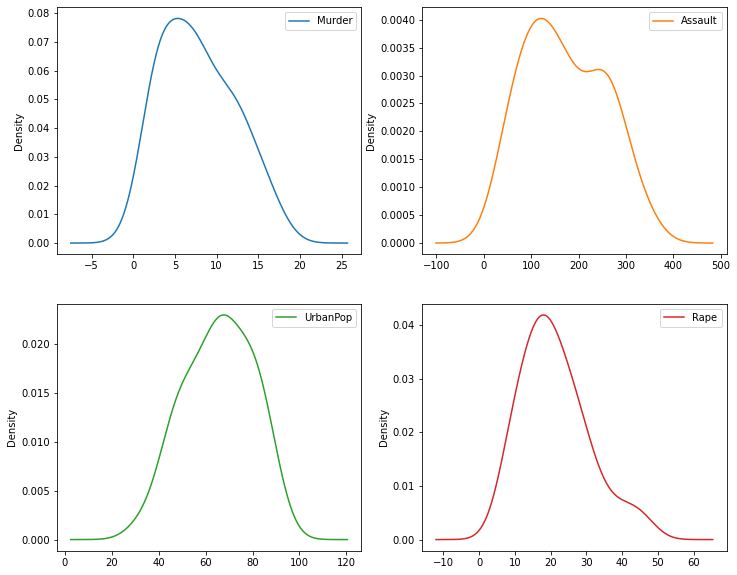

In [10]:
data.plot(kind = 'kde', subplots = True, layout = (2,2), figsize = (12,10), sharex = False, sharey = False)
plt.show()

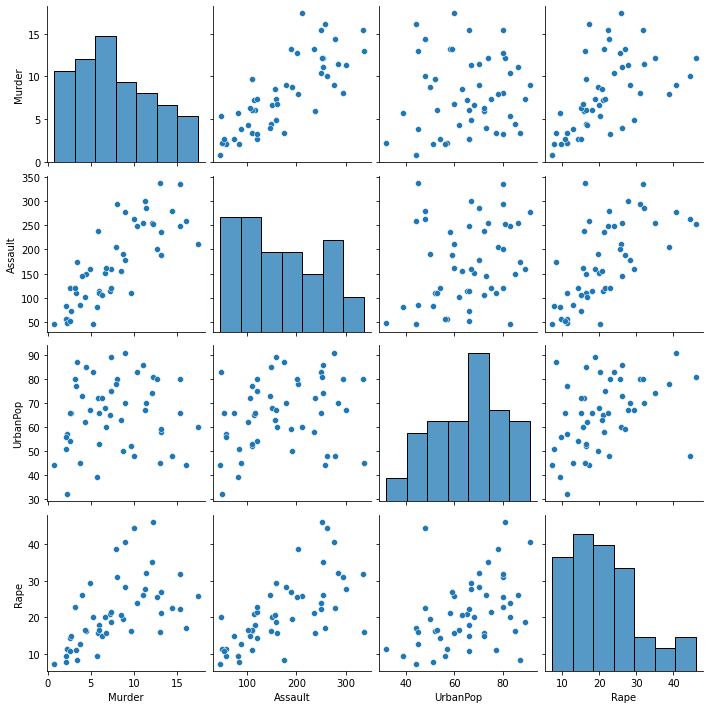

In [11]:
sns.pairplot(data)
plt.show()

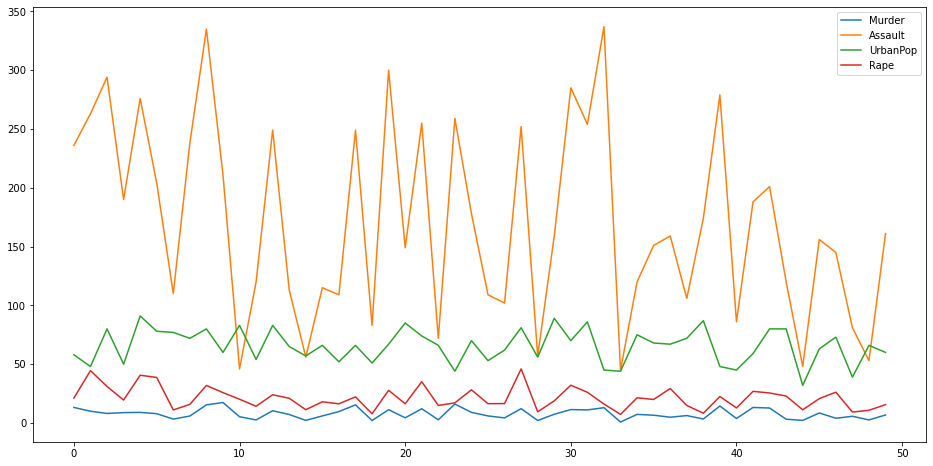

In [12]:
data.plot(figsize = (16,8))
plt.show()

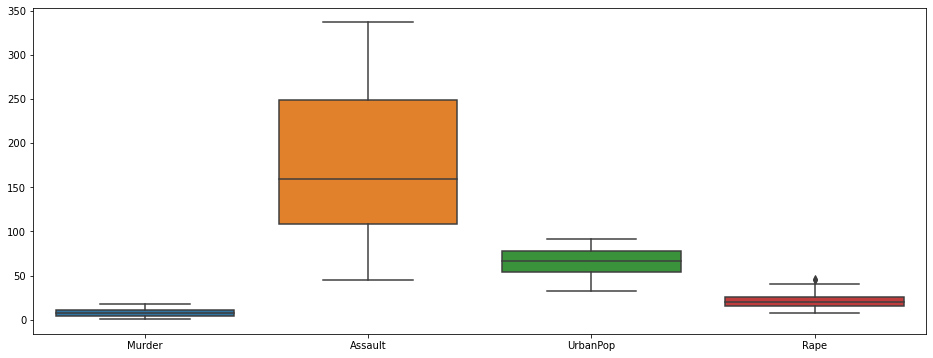

In [13]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = data)
plt.show()

### Outlier treatment

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
If = IsolationForest()
If.fit(data)

IsolationForest()

In [16]:
find_outliers = If.predict(data)

In [17]:
#-1 for outliers and 1 for inliers.
find_outliers

array([ 1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1])

In [19]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [21]:
data['score']= If.decision_function(data.iloc[:, 0:4])
data['anomaly'] = If.predict(data.iloc[:, 0:4])
data.head()

,Murder,Assault,UrbanPop,Rape,score,anomaly
0,13.2,236,58,21.2,4.92e-02,1
1,10.0,263,48,44.5,-8.66e-02,-1
2,8.1,294,80,31.0,7.28e-03,1
3,8.8,190,50,19.5,2.78e-02,1
4,9.0,276,91,40.6,-7.90e-02,-1


In [22]:
ana = data['anomaly'] == -1
data[ana]

,Murder,Assault,UrbanPop,Rape,score,anomaly
1,10.0,263,48,44.5,-8.66e-02,-1
4,9.0,276,91,40.6,-7.90e-02,-1
5,7.9,204,78,38.7,-1.52e-02,-1
8,15.4,335,80,31.9,-7.80e-02,-1
9,17.4,211,60,25.8,-3.35e-02,-1
10,5.3,46,83,20.2,-1.32e-02,-1
18,2.1,83,51,7.8,-9.08e-03,-1
23,16.1,259,44,17.1,-3.41e-02,-1
27,12.2,252,81,46.0,-4.17e-02,-1
32,13.0,337,45,16.1,-6.01e-02,-1


In [23]:
data.shape

(50, 6)

In [24]:
data1 = data[~ana]
data1.shape

(35, 6)

In [26]:
data1 = data1.drop(['score','anomaly'], axis = 1)
data1.shape

(35, 4)

### Normalization

In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [28]:
scaled_data = scale.fit_transform(data1)
scaled_data

array([[ 1.63204802,  1.06600783, -0.89085502,  0.12193907],
       [ 0.22809346,  1.89353973,  1.15068774,  1.63187053],
       [ 0.4207931 ,  0.40968943, -1.63323421, -0.13998781],
       [-1.09327554, -0.73173387,  0.87229554, -1.43421478],
       [-0.377534  ,  1.09454342,  0.40830855, -0.71006398],
       [-1.28597519, -0.58905595, -1.26204462, -0.9565834 ],
       [ 0.86124944,  1.25148912,  1.42907994,  0.55334806],
       [-0.01966323, -0.68893049, -0.24127324,  0.09112414],
       [-1.39608927, -1.50219459, -0.98365242, -1.40339985],
       [-0.35000548, -0.66039491, -0.14847584, -0.37109977],
       [ 0.66854979, -0.74600166, -1.44763942, -0.63302666],
       [ 2.23767548,  1.25148912, -0.14847584,  0.27601371],
       [ 1.10900613,  1.97914647, -0.05567844,  1.13883169],
       [-0.79046181, -0.17529001,  1.61467473, -0.63302666],
       [ 1.32923429,  1.33709587,  0.59390335,  2.26357655],
       [-1.25844667, -1.27390993, -0.14847584, -0.84873115],
       [ 0.47585015,  0.

### How many clusters?

In [31]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [32]:
cluster_range = range(1,20)
cluster_inertia = []
for n in cluster_range:
    clusters = KMeans(n, n_init=10)
    clusters.fit(scaled_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_inertia.append(clusters.inertia_)
clusters_df = pd.DataFrame({'number_of_clusters' : cluster_range, 
                           'cluster_inertia' : cluster_inertia})
clusters_df

,number_of_clusters,cluster_inertia
0,1,140.00
1,2,73.57
2,3,52.55
3,4,42.94
4,5,35.48
5,6,30.31
6,7,26.83
7,8,23.08
8,9,20.36
9,10,18.16


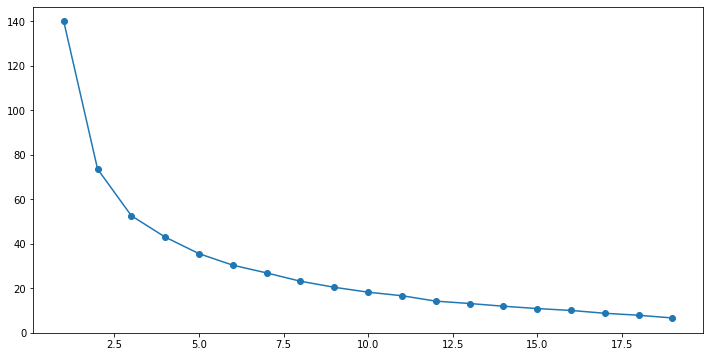

In [33]:
# Elbow curve
plt.figure(figsize = (12,6))
plt.plot(clusters_df.number_of_clusters, clusters_df.cluster_inertia, marker = 'o')
plt.show()

In [34]:
#silhouette_score
from sklearn.metrics import silhouette_score

cluster_range = range(2,20)
sil_score = []
for n in cluster_range:
    clusters = KMeans(n, n_init=10)
    pred = clusters.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, pred)
    sil_score.append(score)
    #print("For n_clusters =", n,"The average silhouescortte_score is :", sil_score)
    
clusters_df1 = pd.DataFrame({'number_of_clusters' : cluster_range, 
                           'sil_score' : sil_score})
clusters_df1

,number_of_clusters,sil_score
0,2,0.40
1,3,0.31
2,4,0.29
3,5,0.28
4,6,0.27
5,7,0.27
6,8,0.28
7,9,0.28
8,10,0.27
9,11,0.29


In [35]:
clusters_df1.sort_values(by = 'sil_score', ascending = False)

,number_of_clusters,sil_score
0,2,0.40
1,3,0.31
2,4,0.29
9,11,0.29
3,5,0.28
6,8,0.28
7,9,0.28
4,6,0.27
5,7,0.27
8,10,0.27


### K-means

In [37]:
model_kmeans = KMeans(n_clusters = 3, max_iter=100)
model_kmeans.fit(scaled_data)

KMeans(max_iter=100, n_clusters=3)

In [38]:
#centriods
model_kmeans.cluster_centers_

array([[-0.71037884, -0.8549557 , -1.03426919, -0.93417254],
       [ 1.19909947,  1.18663552,  0.41674468,  1.05899301],
       [-0.41353284, -0.28065216,  0.52252074, -0.10561732]])

In [39]:
model_kmeans.labels_

array([1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0])

In [40]:
new_data = scaled_data.copy()
new_data= pd.DataFrame(new_data, columns=data1.columns)
new_data

,Murder,Assault,UrbanPop,Rape
0,1.63e+00,1.07e+00,-0.89,0.12
1,2.28e-01,1.89e+00,1.15,1.63
2,4.21e-01,4.10e-01,-1.63,-0.14
3,-1.09e+00,-7.32e-01,0.87,-1.43
4,-3.78e-01,1.09e+00,0.41,-0.71
5,-1.29e+00,-5.89e-01,-1.26,-0.96
6,8.61e-01,1.25e+00,1.43,0.55
7,-1.97e-02,-6.89e-01,-0.24,0.09
8,-1.40e+00,-1.50e+00,-0.98,-1.40
9,-3.50e-01,-6.60e-01,-0.15,-0.37


In [41]:
new_data['cluster_label'] = model_kmeans.labels_

In [42]:
new_data.groupby('cluster_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster_label,,,,
0,-0.71,-0.85,-1.03,-0.93
1,1.20,1.19,0.42,1.06
2,-0.41,-0.28,0.52,-0.11


In [43]:
new_data.cluster_label.value_counts()

2    13
0    11
1    11
Name: cluster_label, dtype: int64

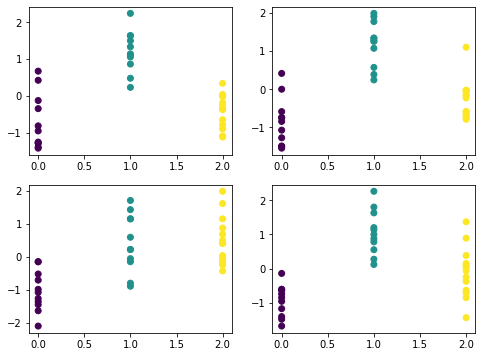

In [46]:
# Plot Clusters
plt.figure(figsize=(8, 6))  
plt.subplot(2,2,1)
plt.scatter(new_data['cluster_label'],new_data['Murder'], c=new_data.cluster_label) 

plt.subplot(2,2,2)
plt.scatter(new_data['cluster_label'],new_data['Assault'], c=new_data.cluster_label) 

plt.subplot(2,2,3)
plt.scatter(new_data['cluster_label'],new_data['UrbanPop'], c=new_data.cluster_label) 

plt.subplot(2,2,4)
plt.scatter(new_data['cluster_label'],new_data['Rape'], c=new_data.cluster_label) 
plt.show()

### Hierarchical Clustering

In [47]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

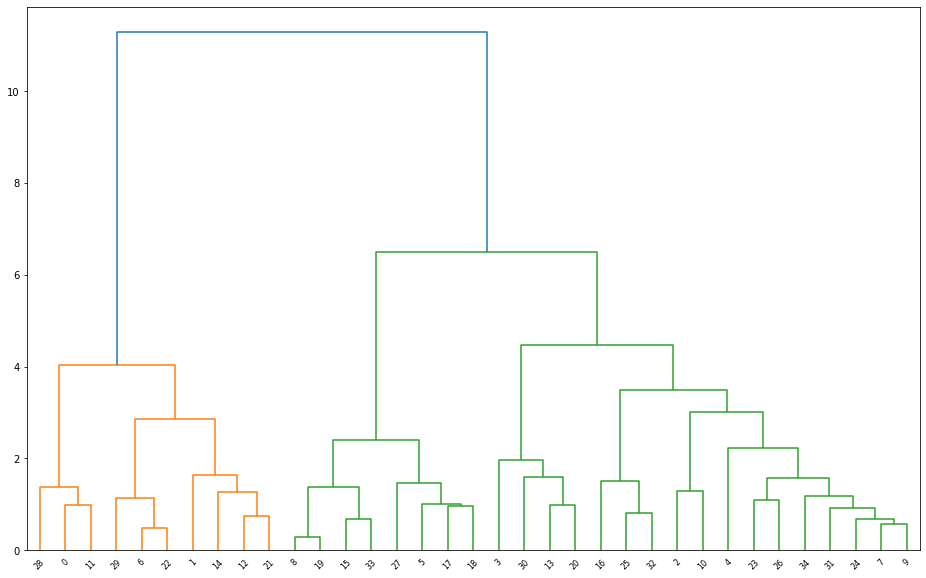

In [48]:
# Create Dendrograms
plt.figure(figsize=(16, 10))  
dendograms=sch.dendrogram(sch.linkage(scaled_data,'ward'))

In [50]:
# Create Clusters
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters_id = hclusters.fit_predict(scaled_data)

In [51]:
new_data1 = scaled_data.copy()
new_data1= pd.DataFrame(new_data1, columns=data1.columns)
new_data1['h_cluster_label'] = hclusters_id

In [52]:
new_data1.h_cluster_label.value_counts()

0    17
1    10
2     8
Name: h_cluster_label, dtype: int64

In [53]:
new_data1.groupby('h_cluster_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_cluster_label,,,,
0,-0.23,-0.22,0.19,-0.10
1,1.27,1.28,0.44,1.04
2,-1.10,-1.13,-0.95,-1.10


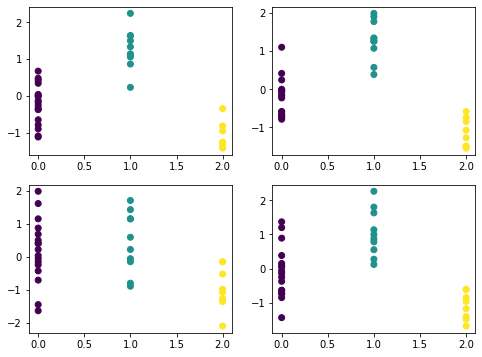

In [55]:
# Plot Clusters
plt.figure(figsize=(8, 6))  
plt.subplot(2,2,1)
plt.scatter(new_data1['h_cluster_label'],new_data1['Murder'], c=new_data1.h_cluster_label) 

plt.subplot(2,2,2)
plt.scatter(new_data1['h_cluster_label'],new_data1['Assault'], c=new_data1.h_cluster_label) 

plt.subplot(2,2,3)
plt.scatter(new_data1['h_cluster_label'],new_data1['UrbanPop'], c=new_data1.h_cluster_label) 

plt.subplot(2,2,4)
plt.scatter(new_data1['h_cluster_label'],new_data1['Rape'], c=new_data1.h_cluster_label) 
plt.show()

### DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

In [90]:
dbscan = DBSCAN(eps = 1, min_samples=4)
dbscan.fit(scaled_data)

DBSCAN(eps=1, min_samples=4)

In [91]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1, -1, -1, -1, -1,  0, -1,
        0,  0,  1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1,  1,
        0], dtype=int64)

In [92]:
new_data2 = scaled_data.copy()
new_data2= pd.DataFrame(new_data2, columns=data1.columns)
new_data2['DB_cluster_label'] = dbscan.labels_

In [93]:
new_data2.DB_cluster_label.value_counts()

-1    21
 0    11
 1     3
Name: DB_cluster_label, dtype: int64

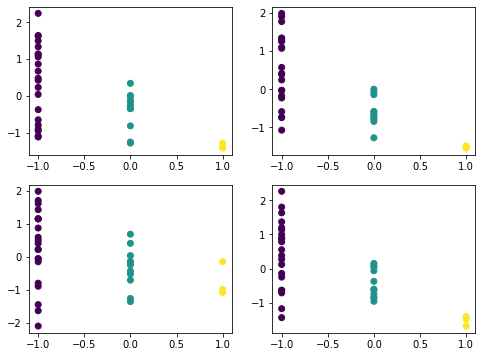

In [95]:
# Plot Clusters
plt.figure(figsize=(8, 6))  
plt.subplot(2,2,1)
plt.scatter(new_data2['DB_cluster_label'],new_data2['Murder'], c=new_data2.DB_cluster_label) 

plt.subplot(2,2,2)
plt.scatter(new_data2['DB_cluster_label'],new_data2['Assault'], c=new_data2.DB_cluster_label) 

plt.subplot(2,2,3)
plt.scatter(new_data2['DB_cluster_label'],new_data2['UrbanPop'], c=new_data2.DB_cluster_label) 

plt.subplot(2,2,4)
plt.scatter(new_data2['DB_cluster_label'],new_data2['Rape'], c=new_data2.DB_cluster_label) 
plt.show()